In [55]:
#!pip install Jinja2

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [57]:
df = pd.read_csv("../../data/preprocessed/luftung_warme_weather.csv",delimiter=',',encoding='UTF-8')

In [58]:
def timestamp_to_datetime(timestamp):
    return datetime.datetime.fromisoformat(timestamp)
    

In [59]:
df['timestamp'] = df['timestamp'].apply(timestamp_to_datetime)

In [60]:
df['day'] = [x.day for x in df['timestamp']]
df['month'] = [x.month for x in df['timestamp']]
df['year'] = [x.year for x in df['timestamp']]
df['hour'] = [x.hour for x in df['timestamp']]
#minute not imp if we're sampling hourly
#df['minute'] = [x.minute for x in df['timestamp']] 

### Considering only electricity usage as energy type

In [61]:
df = df[['timestamp', 'vent_heating','Graz Temperature [2 m elevation corrected]',
       'Graz Shortwave Radiation', 'Graz Direct Shortwave Radiation',
       'Graz Diffuse Shortwave Radiation', 'Graz Relative Humidity [2 m]',
       'is_schoolday', 'day', 'month', 'year', 'hour']]

In [62]:
df

,timestamp,vent_heating,Graz Temperature [2 m elevation corrected],Graz Shortwave Radiation,Graz Direct Shortwave Radiation,Graz Diffuse Shortwave Radiation,Graz Relative Humidity [2 m],is_schoolday,day,month,year,hour
0,2021-06-14 00:15:00,0.0,4.321370,0.000000,0.00000,0.000000,73.00,1,14,6,2021,0
1,2021-06-14 00:30:00,0.0,4.306370,0.000000,0.00000,0.000000,71.00,1,14,6,2021,0
2,2021-06-14 00:45:00,0.0,4.291370,0.000000,0.00000,0.000000,69.00,1,14,6,2021,0
3,2021-06-14 01:00:00,0.0,4.276370,0.000000,0.00000,0.000000,67.00,1,14,6,2021,1
4,2021-06-14 01:15:00,0.0,4.261370,0.000000,0.00000,0.000000,65.00,1,14,6,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...
39614,2022-07-31 15:45:00,0.0,13.126369,448.114990,266.19872,181.916270,39.00,0,31,7,2022,15
39615,2022-07-31 16:00:00,0.0,13.188869,426.532485,251.79243,174.740055,39.00,0,31,7,2022,16
39616,2022-07-31 16:15:00,0.0,13.251369,404.949980,237.38614,167.563840,39.00,0,31,7,2022,16
39617,2022-07-31 16:30:00,0.0,13.178869,373.577485,217.52228,156.055203,39.25,0,31,7,2022,16


In [63]:
df.corr().style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_13873/543879950.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm')


,vent_heating,Graz Temperature [2 m elevation corrected],Graz Shortwave Radiation,Graz Direct Shortwave Radiation,Graz Diffuse Shortwave Radiation,Graz Relative Humidity [2 m],is_schoolday,day,month,year,hour
vent_heating,1.000000,0.001359,0.000216,0.000197,0.000234,-0.000459,0.000462,-0.000032,0.000294,-0.000260,-0.000192
Graz Temperature [2 m elevation corrected],0.001359,1.000000,0.449260,0.430635,0.449366,-0.445983,0.227870,0.015156,-0.045064,-0.009655,0.149417
Graz Shortwave Radiation,0.000216,0.449260,1.000000,0.985027,0.954351,-0.574247,0.019375,-0.003451,0.092406,-0.110037,0.193324
Graz Direct Shortwave Radiation,0.000197,0.430635,0.985027,1.000000,0.888567,-0.565571,0.013546,-0.000545,0.084038,-0.102593,0.176666
Graz Diffuse Shortwave Radiation,0.000234,0.449366,0.954351,0.888567,1.000000,-0.548167,0.028088,-0.008238,0.100289,-0.115057,0.208344
Graz Relative Humidity [2 m],-0.000459,-0.445983,-0.574247,-0.565571,-0.548167,1.000000,-0.092144,0.010610,0.009841,-0.072487,-0.284135
is_schoolday,0.000462,0.227870,0.019375,0.013546,0.028088,-0.092144,1.000000,-0.075082,-0.129006,0.147935,0.000933
day,-0.000032,0.015156,-0.003451,-0.000545,-0.008238,0.010610,-0.075082,1.000000,0.006469,-0.041007,-0.001496
month,0.000294,-0.045064,0.092406,0.084038,0.100289,0.009841,-0.129006,0.006469,1.000000,-0.798120,-0.000130
year,-0.000260,-0.009655,-0.110037,-0.102593,-0.115057,-0.072487,0.147935,-0.041007,-0.798120,1.000000,-0.000889


In [64]:
X = df[['Graz Temperature [2 m elevation corrected]',
       'Graz Shortwave Radiation', 'Graz Direct Shortwave Radiation',
       'Graz Diffuse Shortwave Radiation', 'Graz Relative Humidity [2 m]',
       'is_schoolday', 'day', 'month', 'hour']]
Y = df['vent_heating']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Fitting vent_heating DTR model

### Decision Tree Regressor

In [66]:
DecTreeReg= DecisionTreeRegressor()
DecTreeReg.fit(X_train, y_train)

DecisionTreeRegressor()

In [67]:
DTRPred=DecTreeReg.predict(X_test)

Evaluation

In [68]:
mse = (np.sqrt(mean_squared_error(y_test, DTRPred)))
r2= r2_score(y_test, DTRPred)
mae = mean_absolute_error(y_test, DTRPred)
print("Perfomance for test set {:.2f}".format(r2))

Perfomance for test set -0.87


<Figure size 640x480 with 0 Axes>

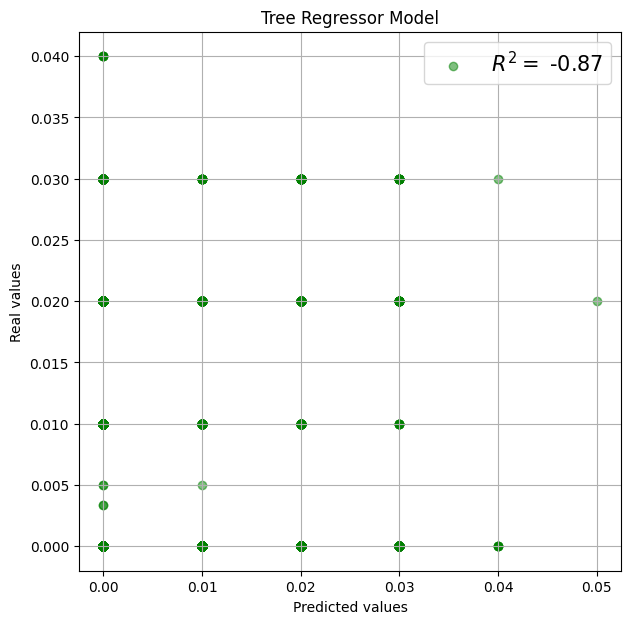

In [69]:
plt.figure()
plt.figure(figsize=(7, 7))
plt.grid()
plt.scatter(y_test,DTRPred,alpha=0.5
        ,color='green',label=r'$R^2 = $ {:.2f}'.format(r2))
plt.title("Tree Regressor Model")
plt.ylabel("Real values")
plt.xlabel("Predicted values")
plt.legend(prop={'size': 15})
plt.show()

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vent_heating,39619.0,0.003677,1.869360,-263.10000,0.00000,0.000000,0.000000,263.100000
Graz Temperature [2 m elevation corrected],39619.0,11.738907,9.060540,-8.69863,3.52137,11.828869,19.390120,32.621372
Graz Shortwave Radiation,39619.0,158.009441,221.462883,0.00000,0.00000,13.795000,279.460000,901.570000
Graz Direct Shortwave Radiation,39619.0,93.963625,144.193548,-6.14830,0.00000,3.694351,156.660000,612.543100
Graz Diffuse Shortwave Radiation,39619.0,64.045816,83.227633,0.00000,0.00000,6.694017,126.372067,301.075260
Graz Relative Humidity [2 m],39619.0,63.800670,14.709801,24.00000,53.00000,63.000000,74.000000,98.000000
is_schoolday,39619.0,0.513668,0.499819,0.00000,0.00000,1.000000,1.000000,1.000000
day,39619.0,15.989450,8.764928,1.00000,8.00000,16.000000,24.000000,31.000000
month,39619.0,6.539640,3.246835,1.00000,4.00000,7.000000,9.000000,12.000000
year,39619.0,2021.512986,0.499838,2021.00000,2021.00000,2022.000000,2022.000000,2022.000000


In [71]:
test_df = X_test
test_df['vent_heating_pred'] = DTRPred
test_df['vent_heating_real'] = y_test

In [72]:
test_df

,Graz Temperature [2 m elevation corrected],Graz Shortwave Radiation,Graz Direct Shortwave Radiation,Graz Diffuse Shortwave Radiation,Graz Relative Humidity [2 m],is_schoolday,day,month,hour,vent_heating_pred,vent_heating_real
29937,13.796370,0.0000,0.000000,0.000000,73.50,1,21,4,20,0.00,0.00
29885,10.986370,0.0000,0.000000,0.000000,86.75,1,21,4,7,0.00,0.00
12701,15.808869,173.7725,96.701396,77.071106,76.50,0,24,10,7,0.02,0.02
3502,0.551370,300.8200,174.012590,126.807423,70.50,0,20,7,11,0.00,0.00
198,2.866370,0.0000,0.000000,0.000000,57.50,1,16,6,1,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
904,6.321370,16.9100,4.183633,12.726367,94.00,1,23,6,10,0.00,0.00
11592,22.141370,372.0200,220.344700,151.675300,32.00,1,12,10,18,0.02,0.00
38815,0.923870,0.0000,0.000000,0.000000,85.50,0,23,7,8,0.00,0.00
4705,-0.578630,0.0000,0.000000,0.000000,77.25,0,2,8,0,0.00,0.00
